## Locally Weighted Regression,
* 1) Read and Normalise the Dataset.
* 2) Generate W for every query point!
* 3) No training is involved, directly make predictions using closed form solution we dervied!,`(X′WX)inv * X′WY` where X' is X_Transpose.
* 4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Data

In [2]:
dfx=pd.read_csv("../Datasets/weightedX.csv")
dfy=pd.read_csv("../Datasets/weightedY.csv")

In [3]:
X=dfx.values
y=dfy.values
print(X.shape)
print(y.shape)

(99, 1)
(99, 1)


In [4]:
X=(X-X.mean())/X.std()

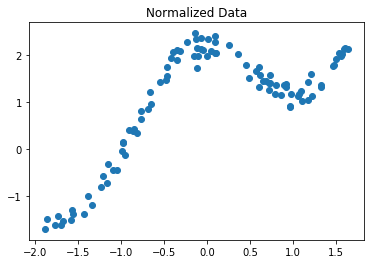

In [5]:
plt.scatter(X,y)
plt.title("Normalized Data")
plt.show()

* If a&b are numpy matrices then a*b will return matrix multiplication whereas if a&b are the numpy arrays, it will return the element wise multiplication.

## 2. Weight Matrix

In [6]:
def Weight(query_point,X,tau):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    
    for i in range(m):
        W[i,i]=np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
    
    return W

In [7]:
X=np.mat(X)
y=np.mat(y)
m=X.shape[0]
W=Weight(-1,X,10)
print(W.shape)
print(W)

(99, 99)
[[0.99793522 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99983397 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99791881 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99489427 0.         0.        ]
 [0.         0.         0.         ... 0.         0.98720262 0.        ]
 [0.         0.         0.         ... 0.         0.         0.97564665]]


## 3. Make Prediction

In [8]:
def prediction(X,y,query_x,tau):
    ones=np.ones((X.shape[0],1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=Weight(qx,X_,tau)
    
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*y))
    pred=np.dot(qx,theta)
    return theta,pred

In [9]:
theta,pred=prediction(X,y,1.0,1.0)

In [10]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [11]:
print(pred)

[[1.59417694]]


## 4. Visualize Predictions

In [12]:
def plot_pred(tau):
    X_test=np.linspace(-2,2,20)
    y_test=[]
    
    for i in X_test:
        theta,pred=prediction(X,y,i,tau)
        y_test.append(pred[0][0])
        
    y_test=np.array(y_test)
    
    Xo=np.array(X)
    yo=np.array(y)
    
    plt.title("Bandwidth Parameter = %.1f"%(tau))
    plt.scatter(Xo,yo)
    plt.scatter(X_test,y_test,color='orange')
    plt.show()

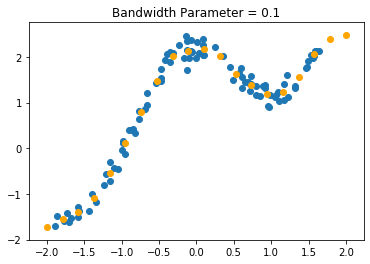

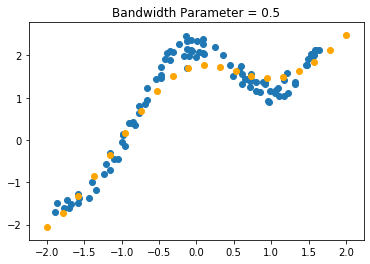

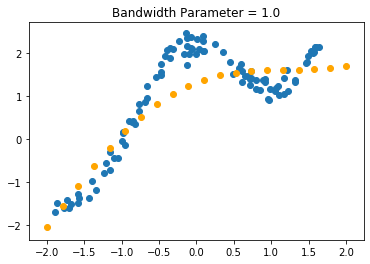

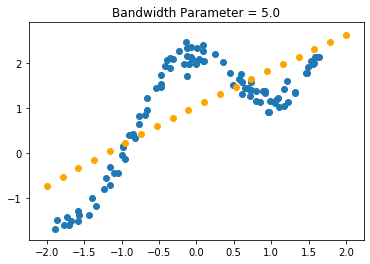

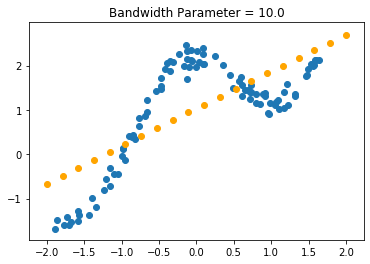

In [13]:
taus=[.1,.5,1,5,10]
for i in taus:
    plot_pred(i)